In [96]:
import numpy as np
import scipy as sp
import seaborn as sns
import tensorflow as tf
from pylab import rcParams
from main import NPHC
from scipy.linalg import inv, sqrtm, eigh, pinv
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
from utils.loader import load_data
# Load Cumulants object
kernel = 'exp_d10'
mode = 'nonsym_1'
log10T = 10
url = 'https://s3-eu-west-1.amazonaws.com/nphc-data/{}_{}_log10T{}_with_params_without_N.pkl.gz'.format(kernel, mode, log10T)
cumul, Alpha, Beta, Gamma = load_data(url)

/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


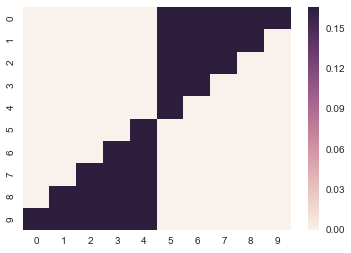

In [98]:
sns.heatmap(Alpha[::-1])

In [99]:
# Params
learning_rate = 1e1
training_epochs = 1001
display_step = 200
d = cumul.dim

In [100]:
U, s, V = np.linalg.svd(cumul.C)
sqrt_C = sqrtm(cumul.C)
sqrt_L = np.sqrt(cumul.L)
#initial = tf.ones([d,d])
initial = tf.constant(np.dot(sqrt_C,np.diag(1./sqrt_L)).astype(np.float32), shape=[d,d])
#initial = tf.constant([[float(i+j*d)/(d**2) for i in range(d)] for j in range(d)], shape=[d,d])

In [109]:
R = NPHC(cumul,initial,alpha=0.9,training_epochs=training_epochs,stochastic=False,weightGMM='eye',\
         display_step=display_step,learning_rate=learning_rate,optimizer='adam')

Epoch: 0000 log10(cost)= -9.215525627
Epoch: 0200 log10(cost)= -11.512453079
Epoch: 0400 log10(cost)= -11.599760056
Epoch: 0600 log10(cost)= -11.612856865
Epoch: 0800 log10(cost)= -11.616405487
Epoch: 1000 log10(cost)= -11.617541313
Optimization Finished!


In [110]:
initial = tf.constant(R,shape=[d,d])

/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


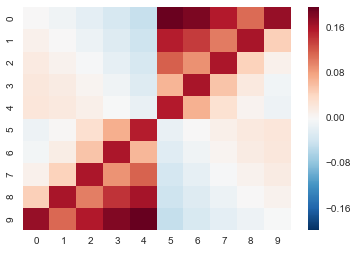

In [111]:
from scipy.linalg import inv
G = np.eye(R.shape[0]) - inv(R)
#G[G<0]=0
sns.heatmap(G[::-1])

In [104]:
import gzip, pickle
f = gzip.open('results.pkl.gz','rb')
L, results = pickle.load(f)
f.close()

('plaw_d10', 'nonsym_1', 10)


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


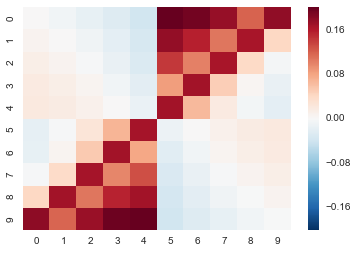

In [105]:
i = 6
print(L[i])
R = results[i]
from scipy.linalg import inv
G = np.eye(R.shape[0]) - inv(R)
#G[G<.5*np.max(G)]=0
sns.heatmap(G[::-1])